In [183]:
"""
Created on Mon Feb 17 21:18:22 2020
The following notebook analyzes data from the AirBnB platform and is 
used for submission for the Data Science Blog project as part of the Udacity 
Nanodegree program. The data used is included in the form of CSV files.
@author: Repoman
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

#The questions from possible stakeholders that I would like to answer in the 
#context of this notebook are as follows:
#What does the current booking distribution of rooms and districts in Bosten 
#look like in December 2019?
#What is the mean price of the two most booked carpentry work in Bosten 
#in December 2019?
#What do the two questions look like in Bosten in December 2018?
#Is it possible to predict the price development for all room types 
#using a linear model depending on the room type and neighborhood?
#Questions of a marketing department could be: In which district 
#should we advertise more or what types of rooms should we also market social platforms more?

#We will follow the CRISProcess
#1. We need to load the data
#Loading the data of Boston
df_Boston_Dec_2019 = pd.read_csv('./listings_Boston_Dec_2019.csv')

#CRISProcess
#2. We need to understand the data
#Vis the structur of the dataset
df_Boston_Dec_2019.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5506,https://www.airbnb.com/rooms/5506,20191204162830,2019-12-04,**$79 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,"Private guest room with private bath, You do n...",none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.81
1,6695,https://www.airbnb.com/rooms/6695,20191204162830,2019-12-04,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...",** WELCOME *** FULL PRIVATE APARTMENT In a His...,"Comfortable, Fully Equipped private apartment...",none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.91
2,8789,https://www.airbnb.com/rooms/8789,20191204162830,2019-12-04,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.37
3,10730,https://www.airbnb.com/rooms/10730,20191204162830,2019-12-04,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Bright one bed facing the golden dome of the S...,"Bright, spacious unit, new galley kitchen, new...",none,Beacon Hill is located downtown and is conveni...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.24
4,10811,https://www.airbnb.com/rooms/10811,20191204162830,2019-12-04,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,"Back Bay Studio Apt - Private bath, A/C, Cabl...",Stunning Back Bay furnished studio apartment. ...,none,A one-square mile neighborhood that is arguabl...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.19


In [184]:
#Use to get a sense of the data types and counts in each column. 
#You may need to convert data types as needed.
df_Boston_Dec_2019.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 2.8+ MB


In [191]:
#Whats the shape of the data
num_rows = df_Boston_Dec_2019.shape[0]; #Provide the number of rows in the dataset
num_cols = df_Boston_Dec_2019.shape[1]; #Provide the number of columns in the dataset
print(num_rows);
print(num_cols);

3507
101


In [192]:
#We need to understand the amount of missing values in the data
df_Boston_Dec_2019.isna();

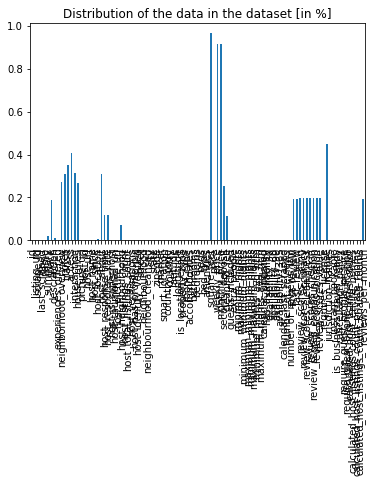

In [193]:
#Now we will vis. the missing values in the dataset for a better understanding
#Provide a pandas series of the counts for each missing value (relativ)
status_vals = df_Boston_Dec_2019.isna().sum()
(status_vals/df_Boston_Dec_2019.shape[0]).plot(kind="bar");
plt.title("Distribution of the data in the dataset [in %]");

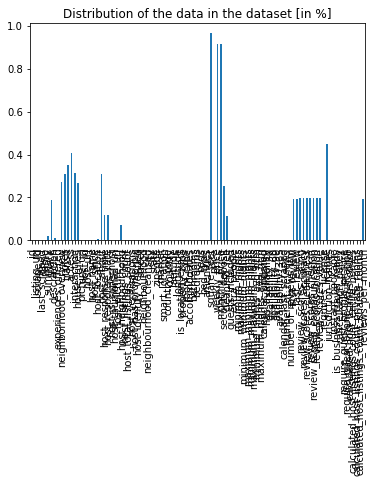

In [195]:
#We will drop all cloumns with no information (with only N/A)
df_Boston_Dec_2019 = df_Boston_Dec_2019.dropna(axis=1, how='all')
#Provide a pandas series of the counts for each missing value (relativ)
status_vals = df.isna().sum()
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Distribution of the data in the dataset [in %]");

               Name     Value
0             price  1.000000
1      weekly_price  0.083262
2     monthly_price  0.084403
3  security_deposit  0.745366
4      cleaning_fee  0.887938


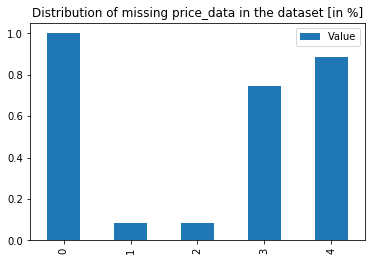

In [196]:
#For answering questions on the prices of a room ect. First of all, we have to understand 
#whether the data is consistent and complete. For this purpose, we check the data on N / A 
#entries and evaluate them by showing the number of missing data in percent.
dis_prices = 1-np.sum(df_Boston_Dec_2019['price'].isnull())/df_Boston_Dec_2019['price'].shape[0]
dis_weekly_prices = 1-np.sum(df_Boston_Dec_2019['weekly_price'].isnull())/df_Boston_Dec_2019['weekly_price'].shape[0]
dis_monthly_price = 1-np.sum(df_Boston_Dec_2019['monthly_price'].isnull())/df_Boston_Dec_2019['monthly_price'].shape[0]
dis_security_deposit = 1-np.sum(df_Boston_Dec_2019['security_deposit'].isnull())/df_Boston_Dec_2019['security_deposit'].shape[0]
dis_cleaning_fee = 1-np.sum(df_Boston_Dec_2019['cleaning_fee'].isnull())/df['cleaning_fee'].shape[0]

#For the vis and to get a better understanding we will create a new dataframe of the distribution of the data
data = {'Name':['price', 'weekly_price', 'monthly_price', 'security_deposit','cleaning_fee'], 
        'Value':[dis_prices, dis_weekly_prices, dis_monthly_price, dis_security_deposit, dis_cleaning_fee]} 

#Building a dataframe of the price distribution
df_prices_dis = pd.DataFrame(data) 
print(df_prices_dis) 

#Now we will vis. the missing values in the dataset for a better understanding
#Provide a pandas series of the counts for each missing value (relativ)
(df_prices_dis).plot(kind="bar");
plt.title("Distribution of missing price_data in the dataset [in %]");

In [198]:
#We can see that the number of complete dates in
#1 weekly_price at 0.083262% and
#2 monthly_price is 0.084403%. 
#In the further consideration, this price information is discarded 
#because it does not make sense to extrapolate the data because 
#the information portion is too small.

#Reducing the dataset for the first analytics
df_Boston_Dec_2019_redux = df_Boston_Dec_2019[['id', 'host_name', 'neighbourhood',
               'price', 'cleaning_fee', 'room_type']]

#For a better understanding we need to know what kind of data type we have got
#in the dataframe
df_Boston_Dec_2019_redux.dtypes

#We can see that the prices are of the typ object
#For our first question we need to cast them into float

#We could like to understand the price policy in Boston
#Therefore it is necessary to cast the columns with digits form object to float
colstocheck = df_Boston_Dec_2019_redux.columns
#To avoid cast problems because of signs like $ we replacing this by a blank
df_Boston_Dec_2019_redux[colstocheck] = df_Boston_Dec_2019_redux[colstocheck].replace({'\$':''}, regex = True)
#In the next step we casting the spec. columns
df_Boston_Dec_2019_redux['price'] = pd.to_numeric(df_redux['price'], errors='coerce')
df_Boston_Dec_2019_redux['cleaning_fee'] = pd.to_numeric(df_redux['cleaning_fee'], errors='coerce')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [199]:
#Now all prices have the data_type float64 and are ready to start with
df_Boston_Dec_2019_redux.dtypes

id                 int64
host_name         object
neighbourhood     object
price            float64
cleaning_fee     float64
room_type         object
dtype: object

In [133]:
#We would like to understand the prices of different room types
#First we need to understand what room type are available
df_Boston_Dec_2019_redux['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [200]:
#Now we have to analyze whether there are n / a
#If the sum of all n/a at room_type is zero we can continue
dis_room_count = df_Boston_Dec_2019_redux.room_type.value_counts();
dis_room_count.sum();
sum(df_redux.room_type.isnull())

0

In [201]:
#CRISProcess
#3. We need to encode the data
#Now we would like to understand the distribution of the data
#First of all we do an encoding of the neighbourhood and room_type
obj_df = df_Boston_Dec_2019_redux.copy()
obj_df.dtypes
obj_df["neighbourhood"] = obj_df["neighbourhood"].astype('category')
obj_df["neighbourhood_cat"] = obj_df["neighbourhood"].cat.codes
obj_df["room_type"] = obj_df["room_type"].astype('category')
obj_df["room_type_cat"] = obj_df["room_type"].cat.codes

In [202]:
#By using the describe function we are we able to see the max, min, mean price and cleaning_fee 
obj_df.describe()

,id,price,cleaning_fee,neighbourhood_cat,room_type_cat
count,3.507000e+03,3479.000000,3479.000000,3507.000000,3507.000000
mean,2.302483e+07,166.946181,74.216182,11.913316,0.725977
std,1.177855e+07,124.175792,50.348220,8.872708,0.968656
min,5.506000e+03,10.000000,0.000000,-1.000000,0.000000
25%,1.377961e+07,85.000000,40.000000,4.000000,0.000000
50%,2.354402e+07,142.000000,74.105652,11.000000,0.000000
75%,3.331801e+07,200.000000,100.000000,21.000000,2.000000
max,4.057364e+07,999.000000,495.000000,27.000000,3.000000


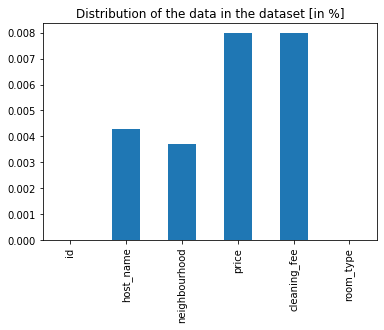

In [203]:
#In the next graph we will see the distribution of missing values
#Provide a pandas series of the counts for each missing value (relativ)
status_vals = df_Boston_Dec_2019_redux.isna().sum()
(status_vals/df_Boston_Dec_2019_redux.shape[0]).plot(kind="bar");
plt.title("Distribution of the data in the dataset [in %]");

In [204]:
#CRISProcess
#4. We need to impute the data
#To analyze the cleaning_fee we will impute the ~10% of the missing values 
#and the ~1% of the missing values in the price by the column mean
# Mean function
df_Boston_Dec_2019_redux['price'] = df_Boston_Dec_2019_redux['price'].fillna(df_Boston_Dec_2019_redux['price'].mean())
df_Boston_Dec_2019_redux['cleaning_fee'] = df_Boston_Dec_2019_redux['cleaning_fee'].fillna(df_Boston_Dec_2019_redux['cleaning_fee'].mean())

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


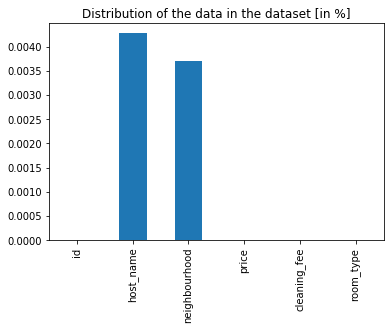

In [205]:
#In the next graph we will see the distribution of missing values
#Provide a pandas series of the counts for each missing value (relativ)
status_vals = df_Boston_Dec_2019_redux.isna().sum()
(status_vals/df_Boston_Dec_2019_redux.shape[0]).plot(kind="bar");
plt.title("Distribution of the data in the dataset [in %]");

In [140]:
#The rest of the missing data are so small, we will drop them
df_Boston_Dec_2019_redux = df_Boston_Dec_2019_redux.dropna(axis=0, how='any');

In [206]:
#For the sake of simplicity, we will consider the data sets for each 
#room type for further analysis
df_entire = df_Boston_Dec_2019_redux.loc[df_Boston_Dec_2019_redux['room_type'] == 'Entire home/apt']
df_proom = df_Boston_Dec_2019_redux.loc[df_Boston_Dec_2019_redux['room_type'] == 'Private room']
df_shared = df_Boston_Dec_2019_redux.loc[df_Boston_Dec_2019_redux['room_type'] == 'Shared room']
df_hotel = df_Boston_Dec_2019_redux.loc[df_Boston_Dec_2019_redux['room_type'] == 'Hotel room']

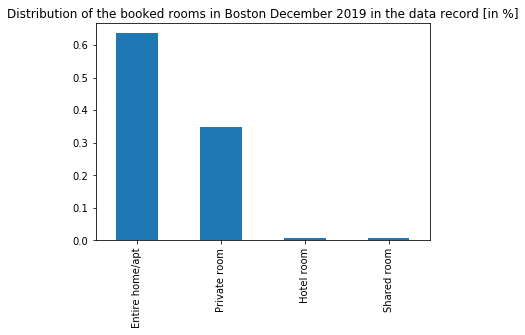

In [207]:
#We would like to see the distribution of booked rooms in Boston in December 2019
#Provide a pandas series of the counts for missing data in %
status_vals = df_Boston_Dec_2019_redux.room_type.value_counts()
(status_vals/df_Boston_Dec_2019_redux.shape[0]).plot(kind="bar");
plt.title("Distribution of the booked rooms in Boston December 2019 in the data record [in %]");

In [208]:
#As you can see, the proportion of hotel rooms and shared rooms is very low in this data set. 
#Therefore, for the time being we will only look at the entire apts and private rooms
#Here we intialise a new dataframe to collect the information 
data_Boston_Dec_2019 = {'Values_Boston_Dec 2019':['Mean_Price', 'Max_Price', 'Min_Price', 'Mean_Cleaning_fee', 'Max_Cleaning_fee', 'Min_Cleaning_fee'],
        'Entire_home/apt_Overview':[df_entire.describe()['price']['mean'], df_entire.describe()['price']['max'], df_entire.describe()['price']['min'], df_entire.describe()['cleaning_fee']['mean'], df_entire.describe()['cleaning_fee']['max'], df_entire.describe()['cleaning_fee']['min']],
        'Private_room_Overview':[df_proom.describe()['price']['mean'], df_proom.describe()['price']['max'], df_proom.describe()['price']['min'], df_proom.describe()['cleaning_fee']['mean'], df_proom.describe()['cleaning_fee']['max'], df_proom.describe()['cleaning_fee']['min']]} 
  
# Create DataFrame 
df_Boston_Dec_2019_values = pd.DataFrame(data_Boston_Dec_2019) 

df_Boston_Dec_2019_values.head(6)

,Values_Boston_Dec 2019,Entire_home/apt_Overview,Private_room_Overview
0,Mean_Price,212.839553,85.377867
1,Max_Price,999.000000,500.000000
2,Min_Price,15.000000,10.000000
3,Mean_Cleaning_fee,93.317631,41.284955
4,Max_Cleaning_fee,495.000000,300.000000
5,Min_Cleaning_fee,0.000000,0.000000


In [209]:
#We would like to compare the data to another dataset of Boston Dec 2018 to understand the
#price behaviour
df_Boston_Dec_2018 = pd.read_csv('./listings_Boston_Dec_2018.csv')

In [210]:
#Reducing the dataset for the first analytics
df_Boston_Dec_2018_redux = df_Boston_Dec_2018[['id', 'host_name', 'neighbourhood',
                                               'price', 'cleaning_fee', 'room_type']]

#We could like to understand the price policy in Boston
#Therefore it is necessary to cast the columns with digits form object to float
colstocheck = df_Boston_Dec_2018_redux.columns
#To avoid cast problems because of signs like $ we replacing this by a blank
df_Boston_Dec_2018_redux[colstocheck] = df_Boston_Dec_2018_redux[colstocheck].replace({'\$':''}, regex = True)
#In the next step we casting the spec. columns
df_Boston_Dec_2018_redux['price'] = pd.to_numeric(df_Boston_Dec_2018_redux['price'], errors='coerce')
df_Boston_Dec_2018_redux['cleaning_fee'] = pd.to_numeric(df_Boston_Dec_2018_redux['cleaning_fee'], errors='coerce')

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

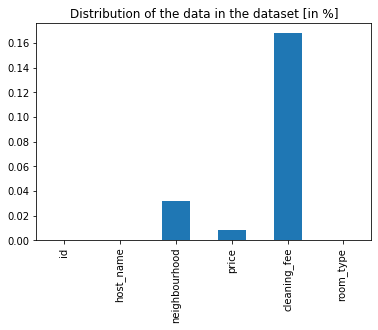

In [211]:
#In the next graph we will see the distribution of missing values
#Provide a pandas series of the counts for each missing value (relativ)
status_vals = df_Boston_Dec_2018_redux.isna().sum()
(status_vals/df_Boston_Dec_2018_redux.shape[0]).plot(kind="bar");
plt.title("Distribution of the data in the dataset [in %]");

In [212]:
#To analyze the cleaning_fee we will impute the ~16% of the missing values 
#and the ~2% of the missing values in the price by the column mean
# Mean function
df_Boston_Dec_2018_redux['price'] = df_Boston_Dec_2018_redux['price'].fillna(df_Boston_Dec_2018_redux['price'].mean())
df_Boston_Dec_2018_redux['cleaning_fee'] = df_Boston_Dec_2018_redux['cleaning_fee'].fillna(df_Boston_Dec_2018_redux['cleaning_fee'].mean())

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [213]:
#The rest of the missing data are so small, we will drop them
df_Boston_Dec_2018_redux = df_Boston_Dec_2018_redux.dropna(axis=0, how='any');

df_entire = [];
df_proom = [];

#For the sake of simplicity, we will consider the data sets for each 
#room type for further analysis
df_entire = df_Boston_Dec_2018_redux.loc[df_Boston_Dec_2018_redux['room_type'] == 'Entire home/apt']
df_proom = df_Boston_Dec_2018_redux.loc[df_Boston_Dec_2018_redux['room_type'] == 'Private room']
df_Boston_Dec_2018_redux.describe()

,id,price,cleaning_fee
count,6.018000e+03,6018.000000,6018.000000
mean,1.844606e+07,164.973470,71.628162
std,8.667613e+06,119.553104,43.002784
min,3.781000e+03,0.000000,0.000000
25%,1.232412e+07,80.000000,40.000000
50%,2.013732e+07,143.000000,71.751015
75%,2.545087e+07,200.000000,100.000000
max,3.079728e+07,999.000000,300.000000


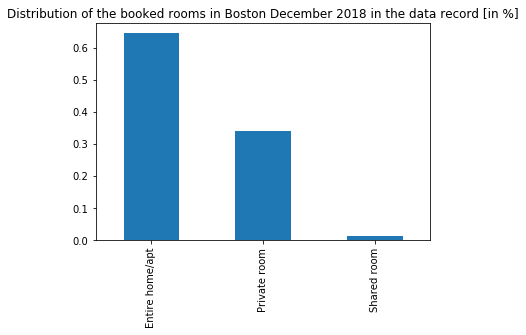

In [214]:
#We would like to see the distribution of booked rooms in Boston in December 2018
#Provide a pandas series of the counts for missing data in %
status_vals = df_Boston_Dec_2018_redux.room_type.value_counts()
(status_vals/df_Boston_Dec_2018_redux.shape[0]).plot(kind="bar");
plt.title("Distribution of the booked rooms in Boston December 2018 in the data record [in %]");

In [215]:
#As you can see, the proportion of hotel rooms and shared rooms is very low in this data set. 
#Therefore, for the time being we will only look at the entire apts and private rooms
#Here we intialise a new dataframe to collect the information 
data_Boston_Dec_2018 = {'Values_Boston_Dec_2018':['Mean_Price', 'Max_Price', 'Min_Price', 'Mean_Cleaning_fee', 'Max_Cleaning_fee', 'Min_Cleaning_fee'],
        'Entire_home/apt_Overview':[df_entire.describe()['price']['mean'], df_entire.describe()['price']['max'], df_entire.describe()['price']['min'], df_entire.describe()['cleaning_fee']['mean'], df_entire.describe()['cleaning_fee']['max'], df_entire.describe()['cleaning_fee']['min']],
        'Private_room_Overview':[df_proom.describe()['price']['mean'], df_proom.describe()['price']['max'], df_proom.describe()['price']['min'], df_proom.describe()['cleaning_fee']['mean'], df_proom.describe()['cleaning_fee']['max'], df_proom.describe()['cleaning_fee']['min']]} 
  
# Create the dataframe of the values from Boston Dec 2018 
df_Boston_Dec_2018_values = pd.DataFrame(data_Boston_Dec_2018) 

# The values from Boston Dex 2019 
df_Boston_Dec_2018_values.head(6)

,Values_Boston_Dec_2018,Entire_home/apt_Overview,Private_room_Overview
0,Mean_Price,210.892293,82.555730
1,Max_Price,999.000000,900.000000
2,Min_Price,0.000000,0.000000
3,Mean_Cleaning_fee,88.388456,41.735513
4,Max_Cleaning_fee,300.000000,175.000000
5,Min_Cleaning_fee,0.000000,0.000000


In [216]:
# The values from Boston Dec 2019
df_Boston_Dec_2019_values.head(6)

,Values_Boston_Dec 2019,Entire_home/apt_Overview,Private_room_Overview
0,Mean_Price,212.839553,85.377867
1,Max_Price,999.000000,500.000000
2,Min_Price,15.000000,10.000000
3,Mean_Cleaning_fee,93.317631,41.284955
4,Max_Cleaning_fee,495.000000,300.000000
5,Min_Cleaning_fee,0.000000,0.000000


In [217]:
#Comparing the prices from 2018 and 2019 we can see an increase of the mean price of Entire_home/apt
mean_price_entire_home_2018 = df_Boston_Dec_2018_values['Entire_home/apt_Overview'][0];
mean_price_entire_home_2019 = df_Boston_Dec_2019_values['Entire_home/apt_Overview'][0];
diff_mean_price_entire_home = mean_price_entire_home_2019-mean_price_entire_home_2018;
diff_mean_price_entire_home

1.9472601778145133

In [218]:
#Comparing the prices from 2018 and 2019 we can see an increase of the mean price of private rooms
mean_price_private_room_2018 = df_Boston_Dec_2018_values['Private_room_Overview'][0];
mean_price_private_room_2019 = df_Boston_Dec_2019_values['Private_room_Overview'][0];
diff_mean_price_private_room = mean_price_private_room_2019-mean_price_private_room_2018;
diff_mean_price_private_room

2.8221366616568133

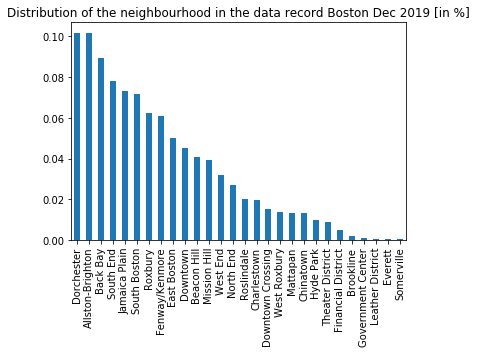

In [222]:
#Provide a pandas series of the counts for each neighbourhood status
ed_vals_Boston_Dec_2019 = pd.Series(df_Boston_Dec_2019_redux.neighbourhood.value_counts())
(ed_vals_Boston_Dec_2019/df_Boston_Dec_2019_redux.shape[0]).plot(kind="bar");
plt.title("Distribution of the neighbourhood in the data record Boston Dec 2019 [in %]");

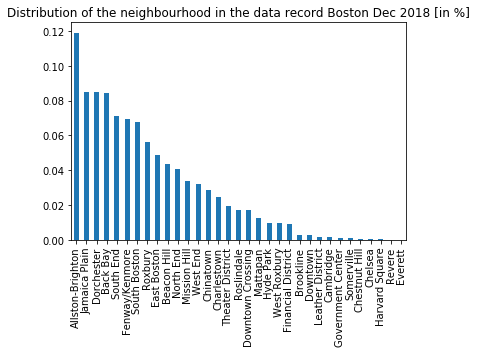

In [223]:
#Provide a pandas series of the counts for each neighbourhood status
ed_vals_Boston_Dec_2018 = pd.Series(df_Boston_Dec_2018_redux.neighbourhood.value_counts())
(ed_vals_Boston_Dec_2018/df_Boston_Dec_2018_redux.shape[0]).plot(kind="bar");
plt.title("Distribution of the neighbourhood in the data record Boston Dec 2018 [in %]");

In [282]:
#
data_allston_dec_2018 = df_Boston_Dec_2018_redux.loc[df_Boston_Dec_2018_redux['neighbourhood'] == 'Allston-Brighton']

In [229]:
#
data_allston_dec_2019 = df_Boston_Dec_2019_redux.loc[df_Boston_Dec_2019_redux['neighbourhood'] == 'Allston-Brighton']

In [228]:
#
data_allston_dec_2018['price'].mean()

109.03976030022267

In [230]:
#
data_allston_dec_2019['price'].mean()

115.63275171473902

In [232]:
#
df_Boston_Dec_2018_redux.head()

,id,host_name,neighbourhood,price,cleaning_fee,room_type
0,3781,Frank,East Boston,125.0,75.0,Entire home/apt
1,5506,Terry,Roxbury,145.0,40.0,Entire home/apt
2,6695,Terry,Roxbury,169.0,70.0,Entire home/apt
3,6976,Phil,Roslindale,65.0,0.0,Private room
4,8789,Anne,Beacon Hill,99.0,250.0,Entire home/apt


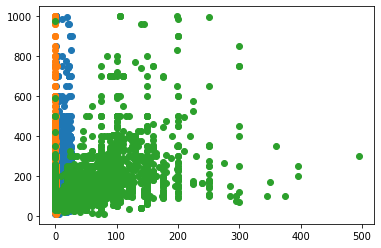

In [277]:
#Modeling and prediting values of the prices
#Pull a list of the column names of the categorical variables
obj_df = df_Boston_Dec_2019_redux.copy()
obj_df.dtypes
obj_df["neighbourhood"] = obj_df["neighbourhood"].astype('category')
obj_df["neighbourhood_cat"] = obj_df["neighbourhood"].cat.codes
obj_df["room_type"] = obj_df["room_type"].astype('category')
obj_df["room_type_cat"] = obj_df["room_type"].cat.codes

#Split into explanatory and response variables
X = obj_df[['neighbourhood_cat', 'room_type_cat', 'cleaning_fee']]
#X = obj_df[['neighbourhood_cat', 'room_type_cat']]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

plt.plot(X,y,'o')
plt.show()

In [278]:
#To retrieve the intercept:
print(lm_model.intercept_)#For retrieving the slope:
print(lm_model.coef_)

149.36521193799842
[  0.77039973 -48.12231936   0.58985529]


In [279]:
df_model_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_preds})

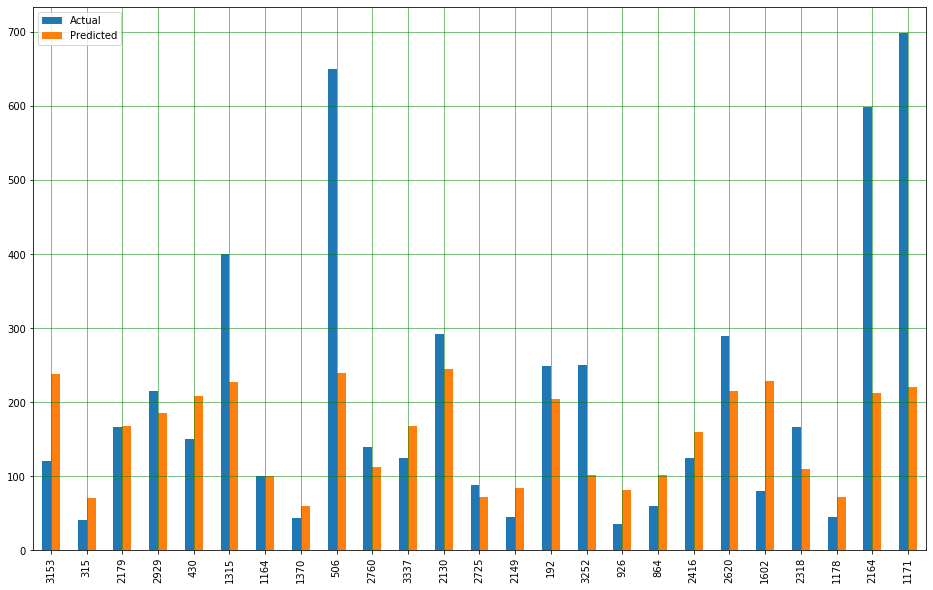

In [280]:
df1 = df_model_output.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

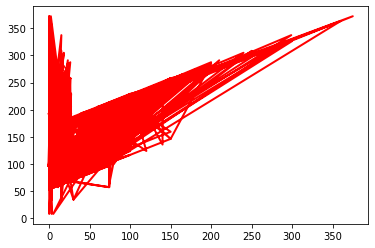

In [281]:
#plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_test_preds, color='red', linewidth=2)
plt.show()